In [1]:
# ATMS 305, Fall 2024 -- Lab20: Correlation
# Today we'll start talking about statistics with: Correlation
#
# Info:
#  scipy stats tutorial: https://docs.scipy.org/doc/scipy/tutorial/stats.html
#  scipy lectures/stats: https://scipy-lectures.org/packages/statistics/index.html
#  Pearson correlation coefficient: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
#

In [7]:
# >> A. IMPORT
#
#  1. import as usual: (a) numpy (b) matplotlib.pyplot (c) pandas
#  2. add to this:
#        import scipy as sp
#        import plotly.express as px
#        from scipy.signal import find_peaks
import scipy as sp
import plotly.express as px
from scipy.signal import find_peaks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# >> B. CORRELATION COEFFICIENT (Markdown figure)
#
#  We're going to generate some curves and compute their correlation -
#    .. in particular, their *correlation coefficient*.
#
#  Wikipedia has a nice figure for this.
#  a) Insert a text cell below this one. We'll use Markdown next.
#  a) Show a heading "CORRELATION" first --
#       ... help:  https://python-markdown.github.io/extensions/toc/
#  b) After the above heading, display the image listed below
#       ... help:  https://stackoverflow.com/questions/10628262/inserting-image-into-ipython-notebook-markdown
#       ... >URL:  https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png

# CORRELATION

![Correlation Coefficient](https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png)

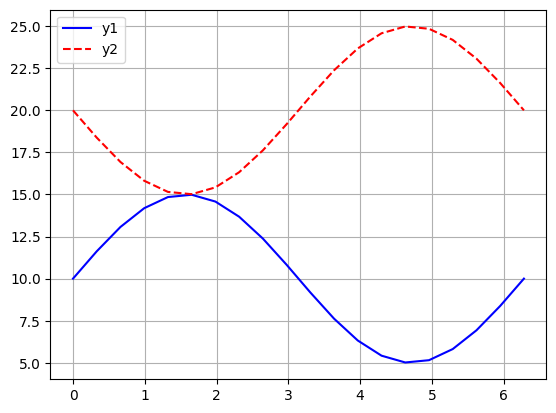

In [9]:
# >> C. SINE CURVES
#
# Now you generate Two sine curves.
# These curves have a phase angle (shift) of 180 degrees: Opposites.
# This is the definition of "negative correlation."
#
# PLOTS:
#   1. After the y1= and y2= statements below, add plt.plot() code --
#      a) plot y1 as solid blue and
#      b) plot y2 as dashed red .. on the same plot figure!
#
#   2. Run the code.  Change nx to 20.  Run it again.
#      Much better!  That's all for this cell.
#
#   3. p.s.: NX is the number of "grid points" defining the curves;
#            angle is the phase shift angle (degrees) between y1, y2.
nx = 20
angle = 180.0
x = np.linspace(0., 2.*np.pi, nx)
y1 = 10 + 5*np.sin(x)
y2 = 20 + 5*np.sin(x - np.pi/180.*angle)

plt.plot(x, y1, 'b', label='y1')
plt.plot(x, y2, 'r--', label='y2')
plt.legend()
plt.grid()

<>:41: SyntaxWarning: invalid escape sequence '\c'
<>:41: SyntaxWarning: invalid escape sequence '\c'
C:\Users\theox\AppData\Local\Temp\ipykernel_2136\2318220278.py:41: SyntaxWarning: invalid escape sequence '\c'
  plt.title('%d$^\circ$phase, corr %.2f, p=%.2f' % (angle,r,p) )


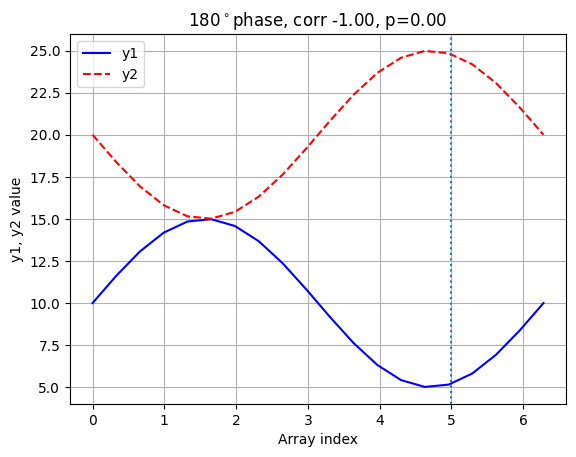

In [12]:
# >> D. CURVES + CORRELATION
#
# STATS:
#   1. Let's use scipy.stat's "pearsonr()" routine to analyze the two
#      curves y1,y2.  pearsonr() returns two values.  Code it like this:
#
#            r,p = sp.stats.pearsonr(y1,y2)
#
#      r, the correlation coefficient, is the >>strength<< of the correlation.
#          r ranges from -1 to +1 like the figure you displayed earlier.
#          r=1 is "perfect" correlation.
#      p, or the 'p-value', is the >>probability<< we would find this result
#          from uncorrelated datasets. If p < 0.05 (5%), we say
#          the correlation "r" is **Statistically significant**
#
# PLOTS:
#   2. Repeat your plt.plot() statements from the last cell - here.
#      a) add label= statements to each plt.plot: "y1" and "y2"
#      b) add the legend.
#
#   3. Add xlabel: Array index  ..and.. ylabel: y1,y2 value
#   4. Add a title. Put the phase shift "angle", r, and p in the plot title.
#      >Do it like this (w/LaTeX formatting for degrees symbol, $^\circ$):
#
#        plt.title('%d$^\circ$phase, corr %.2f, p=%.2f' % (angle,r,p) );
#
# PEAKS:
#   5. Because we need it later, try scipy.signal's find_peaks() to show
#      where the y1 max is located ... then draw a dotted line at the peak.
#      As you will see, it is "close".  Add this code:
#
#           peaks,_ = find_peaks(y1);
#           plt.axvline(peaks,linestyle=':');    # vert line at peaks
#
#      FYI, the ",_" says to ignore other data returned by find_peaks().
r, p = sp.stats.pearsonr(y1, y2)
plt.plot(x, y1, 'b', label='y1')
plt.plot(x, y2, 'r--', label='y2')
plt.xlabel('Array index')
plt.ylabel('y1, y2 value')
plt.title('%d$^\circ$phase, corr %.2f, p=%.2f' % (angle,r,p) )

peaks,_ = find_peaks(y1)
plt.axvline(peaks,linestyle=':');    # vert line at peaks
plt.legend()
plt.grid()

<>:35: SyntaxWarning: invalid escape sequence '\c'
<>:35: SyntaxWarning: invalid escape sequence '\c'
C:\Users\theox\AppData\Local\Temp\ipykernel_2136\2403100268.py:35: SyntaxWarning: invalid escape sequence '\c'
  plt.title('%d$^\circ$phase, corr %.2f, p=%.2f' % (angle,r,p))


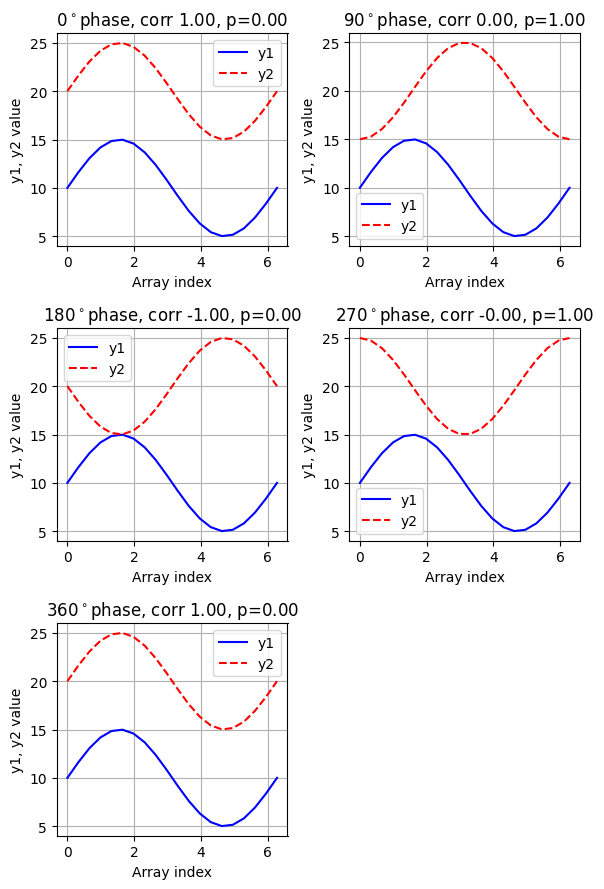

In [18]:
# >> E. CORRELATION FOR A RANGE OF PHASE ANGLES
#
#  180 degrees was "out of phase" and gave a correlation of -1.
#  Here we try phase angles of 0, 90, ..., 360 degrees.
#
#  1. Start a figure with size 6,9 (or choose your own)
#  2. Start a for-loop whose loop variable "n" runs from 0-4 inclusive.
#     Inclusive: don't leave off "4" !!
#     This means you will make 5 plots in total.
#  3. INSIDE the loop:
#    a) plt.subplot(3,2,n+1)
#    b) set "angle" equal to n*90
#    c) use the same expression as previously:  y2 = ...
#    d) plot y1 and y2 as before with legend.
#    e) compute the pearson variables r,p as before.
#    f) use the same title as before.
#    g) don't worry about find_peaks() here.
#  4. Outside of the loop, call tight_layout
#
# CHECK: you should have 5 plots, "mostly" filling up a 3-row 2-column figure.
fig = plt.figure(figsize=(6, 9))

for n in range(0, 5):
    plt.subplot(3, 2, n+1)
    angle = n*90
    x = np.linspace(0., 2.*np.pi, nx)
    y1 = 10 + 5*np.sin(x)
    y2 = 20 + 5*np.sin(x - np.pi/180.*angle)

    r, p = sp.stats.pearsonr(y1, y2)
    plt.plot(x, y1, 'b', label='y1')
    plt.plot(x, y2, 'r--', label='y2')
    plt.xlabel('Array index')
    plt.ylabel('y1, y2 value')
    plt.title('%d$^\circ$phase, corr %.2f, p=%.2f' % (angle,r,p))
    plt.legend()
    plt.grid()
plt.tight_layout()

In [22]:
# >> F. GET STORM SIMULATION DATA
#
# Now we'll shift to "real" data - well, a simulation of a supercell thunderstorm.
# This data follows a mesocyclone (storm rotation center) as it
#   intensifies and weakens, and the wind/rain/etc. near or above it.
#
# The first column is time, starting at 133 minutes.
#
#  1. Get this file:  rfd.atmos.uiuc.edu/305/supercell.txt
#
#  2. Use "!head -5 filename"      ...to see the first 5 lines of the file.
#     > There are two comment lines, then the headings line and data following.
!wget -q -N rfd.atmos.uiuc.edu/305/supercell.txt
import subprocess

subprocess.run(['wget', '-q', '-N', 'http://rfd.atmos.uiuc.edu/305/supercell.txt'])

with open('supercell.txt', 'r') as file:
    for _ in range(5):
        print(file.readline().strip())

Supercell storm simulation, Brian Jewett, Univ. Illinois Atmospheric Sciences

Time   dBZ2k dBZmx  RHsfc   Rain    P    VortSfc  VortAll VrtDepth   Usfc   Vsfc   Wlow    Wmin    Wmax   Tsfc    TPsfc  Tgrad   Qgr    Qra     Convg
133.00 -28.88 56.42  72.46   0.55   3.98  2339.78  3234.00  7740.93  -1.27  -3.00   0.503  -9.556  42.377 18.735  -5.082  6.301  0.000  0.099   -44.75
134.00  -0.85 59.45  67.94   2.70   3.54  3297.29  3818.93  9630.71   4.57 -20.40   0.737 -14.435  36.518 19.294  -4.523  2.399  0.000  0.061   -66.85


In [26]:
# >> G. READ STORM DATA
#
#  1. Read the data file with pandas' read_table() function into variable 'data'.
#     Use option skiprows= to skip over 2 comment lines mentioned previously.
#     You will also need this option: delim_whitespace=True
#
#  2. Finish with data.head(2) to make sure all is well.
#
#  3. FYI, we can refer to the 5th column with any of these:
#        data.Rain
#        data['Rain']
#        data.iloc[:,4]      # all rows, python column=4
#
#  4. FYI #2, data.shape reveals 48 rows (times) and 20 columns (fields).

data = pd.read_table('supercell.txt', skiprows=2, delim_whitespace=True)
data.head()

C:\Users\theox\AppData\Local\Temp\ipykernel_2136\4285391210.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_table('supercell.txt', skiprows=2, delim_whitespace=True)


,Time,dBZ2k,dBZmx,RHsfc,Rain,P,VortSfc,VortAll,VrtDepth,Usfc,Vsfc,Wlow,Wmin,Wmax,Tsfc,TPsfc,Tgrad,Qgr,Qra,Convg
0,133.0,-28.88,56.42,72.46,0.55,3.98,2339.78,3234.00,7740.93,-1.27,-3.00,0.503,-9.556,42.377,18.735,-5.082,6.301,0.0,0.099,-44.75
1,134.0,-0.85,59.45,67.94,2.70,3.54,3297.29,3818.93,9630.71,4.57,-20.40,0.737,-14.435,36.518,19.294,-4.523,2.399,0.0,0.061,-66.85
2,135.0,2.69,56.53,70.85,1.34,3.69,4485.29,4776.70,6065.68,-1.75,-15.07,0.656,-10.649,35.898,18.108,-5.708,3.764,0.0,0.291,-180.13
3,136.0,27.36,56.38,65.93,2.03,4.04,5078.42,5078.42,8141.88,4.84,-19.45,0.874,-14.098,39.383,17.715,-6.102,4.081,0.0,0.406,-150.51
4,137.0,0.39,56.47,63.59,1.57,3.08,4797.01,5002.22,11135.74,9.71,-23.83,0.248,-13.585,35.762,18.301,-5.516,2.960,0.0,0.234,-41.54


In [27]:
# >> H. QUICK SUMMARY
#
#  1. Use .describe() with your data array to get the min, max etc.
#
#  2. You should see min and max Time of 133 and 180, and maximum air
#     rotation (vorticity) at the ground (VortSfc) of 8928.9, which
#     is really 0.089 sec^-2. (stormy people: mesocyclone usually ~ 0.01/s^2)
data.describe()

,Time,dBZ2k,dBZmx,RHsfc,Rain,P,VortSfc,VortAll,VrtDepth,Usfc,Vsfc,Wlow,Wmin,Wmax,Tsfc,TPsfc,Tgrad,Qgr,Qra,Convg
count,48.00,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.000000,48.000000
mean,156.50,30.77625,57.425625,72.449167,7.843750,1.121042,4696.606458,5114.847708,5889.543750,3.526250,-17.047083,0.326188,-10.351896,40.976625,18.416458,-5.400146,2.046458,0.0,1.699542,-51.996667
std,14.00,29.80198,1.864843,10.211637,7.538937,3.080681,1745.959863,1561.212046,3123.353827,4.989002,8.122507,0.478982,3.741660,13.172087,1.542732,1.542779,1.742618,0.0,2.091811,75.276802
min,133.00,-28.88000,53.060000,60.470000,0.080000,-7.930000,1802.230000,2671.210000,388.530000,-6.850000,-30.510000,-1.142000,-15.802000,12.909000,15.916000,-7.901000,0.224000,0.0,0.003000,-251.850000
25%,144.75,0.29750,56.362500,65.717500,1.280000,-0.672500,3401.330000,3798.157500,3650.387500,0.120000,-22.317500,0.048000,-13.516750,30.971500,17.318000,-6.499000,0.658250,0.0,0.165000,-101.710000
50%,156.50,46.34500,57.675000,67.505000,5.325000,2.040000,4435.430000,5038.645000,4833.870000,3.715000,-19.000000,0.290500,-10.892000,42.664500,18.563500,-5.253000,1.494500,0.0,0.581500,-37.195000
75%,168.25,54.83000,58.805000,76.130000,15.650000,3.575000,5691.807500,5927.522500,8696.152500,7.322500,-11.720000,0.657750,-7.047750,51.755250,19.143250,-4.672750,3.655250,0.0,2.357000,-1.702500
max,180.00,57.83000,61.110000,97.040000,24.320000,4.600000,8928.900000,8928.900000,11671.000000,13.580000,4.270000,1.806000,-3.354000,64.139000,22.679000,-1.137000,6.301000,0.0,6.829000,69.530000


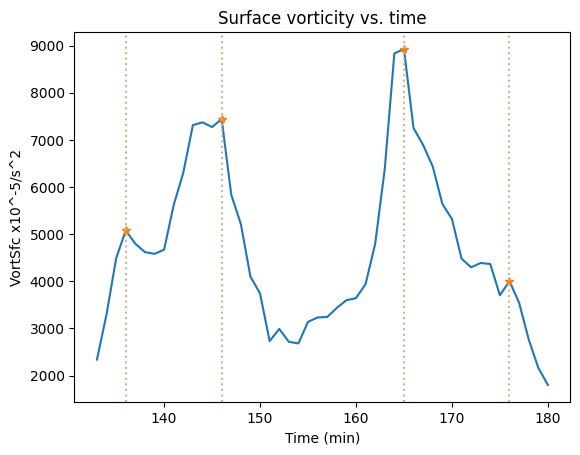

In [29]:
# >> I. FIND AND LABEL PEAKS (in VortSfc, the surface rotation)
#
#  1. Use the find_peaks() function to identify the maxima in VortSfc.
#   a) call find_peaks as done before, but for array: data.VortSfc
#   b) results from find_peaks should be stored in "peaks" as before
#   b) add these options when calling find_peaks() to isolate the maxima:
#          distance=10
#          height=3000
#   c) we'll use the peak data in a moment.
#
#  2. plt.plot() field data.VortSfc versus data.Time
#    a) add xlabel: Time (min)
#    b) add ylabel: VortSfc x10^-5/s^2
#    c) add  title: Surface vorticity vs. time
#    d) use any color, or let plt.plot() pick for you
#
#  3. Plot an asterisk at each peak with:
#        plt.plot(data.Time[peaks],data.VortSfc[peaks],'*');
#
#  4. Draw a vertical dotted line at each peak with:
#       for xc in peaks:
#         plt.axvline(x=data.Time[xc],linestyle=':',color='tan');
peaks,_ = find_peaks(data.VortSfc, distance=10, height=3000)

plt.plot(data.Time, data.VortSfc)
plt.xlabel('Time (min)')
plt.ylabel('VortSfc x10^-5/s^2')
plt.title('Surface vorticity vs. time')
plt.plot(data.Time[peaks],data.VortSfc[peaks],'*')
for xc in peaks:
    plt.axvline(x=data.Time[xc],linestyle=':',color='tan')

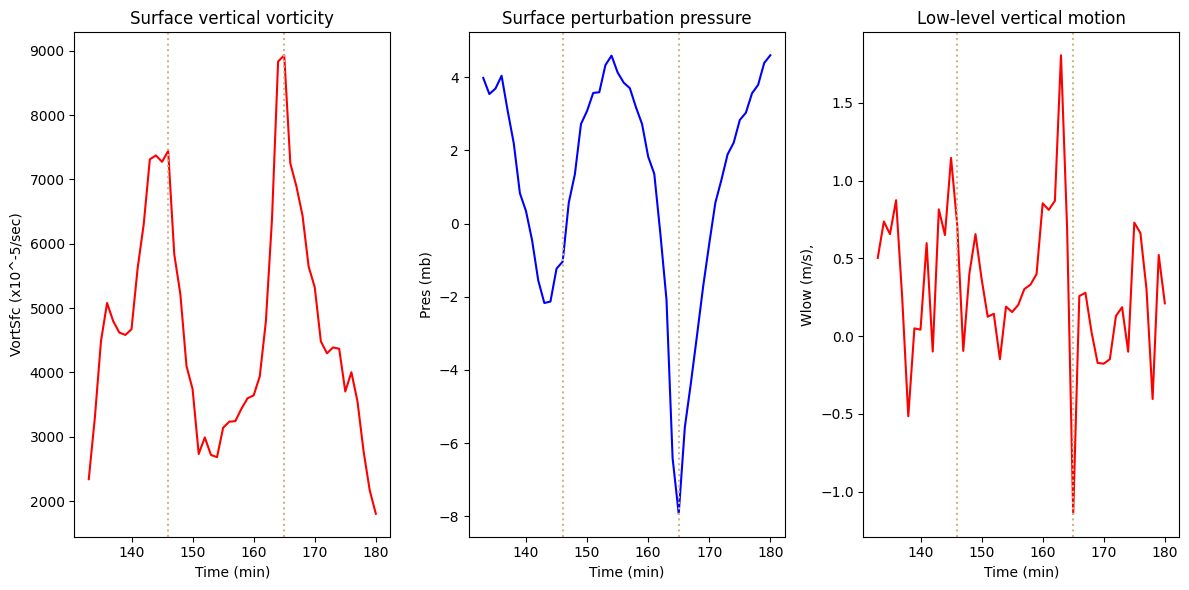

In [34]:
# >> J. 3-PANEL PLOT
#
#  1. Do find_peaks again on data.VortSfc but use option: height=6000
#  2. Start a 12x6" figure, with a 1-row, 3-column plot.
#  3. On all 3 plots, use data.Time as the x-axis variable when plotting.
#  4. On all 3 plots, use xlabel: Time (min)
#
#  5. On left, plot Vortsfc (red) vs. time,
#              ylabel: VortSfc (x10^-5/sec),
#              title: Surface vertical vorticity
#  6. In middle, plot P (blue) vs. time,
#              ylabel: Pres (mb),
#              title: Surface perturbation pressure
#  7. On right, plot Wlow (green) vs. time,
#              ylabel: Wlow (m/s),
#              title: Low-level vertical motion
#
#  8. Now add code to plot vertical dotted lines at peak locations
#     for all 3 plot panels.  So after each subplot, x/ylabel
#     and title, you will repeat the "for xc in peaks..." code
#     used in the last cell.  You pick the line color.
#
#  9. Finish with tight_layout
#
# CHECK: when the storm's rotation intensifies (red curve), the
#   pressure falls, and a downdraft is produced soon after.
#   When we check, VortSfc and Pres will have negative correlation!

fig = plt.figure(figsize=(12, 6))
peaks,_ = find_peaks(data.VortSfc, distance=10, height=6000)

plt.subplot(1, 3, 1)
plt.plot(data.Time, data.VortSfc, 'r')
plt.xlabel('Time (min)')
plt.ylabel('VortSfc (x10^-5/sec)')
plt.title('Surface vertical vorticity')
for xc in peaks:
    plt.axvline(x=data.Time[xc],linestyle=':',color='tan')

plt.subplot(1, 3, 2)
plt.plot(data.Time, data.P, 'b')
plt.xlabel('Time (min)')
plt.ylabel('Pres (mb)')
plt.title('Surface perturbation pressure')
for xc in peaks:
    plt.axvline(x=data.Time[xc],linestyle=':',color='tan')

plt.subplot(1, 3, 3)
plt.plot(data.Time, data.Wlow, 'r')
plt.xlabel('Time (min)')
plt.ylabel('Wlow (m/s),')
plt.title('Low-level vertical motion')
for xc in peaks:
    plt.axvline(x=data.Time[xc],linestyle=':',color='tan')

plt.tight_layout()

Text(0.5, 1.0, 'Surface vorticity and pressure vs. time, corr=-0.12, p=0.41')

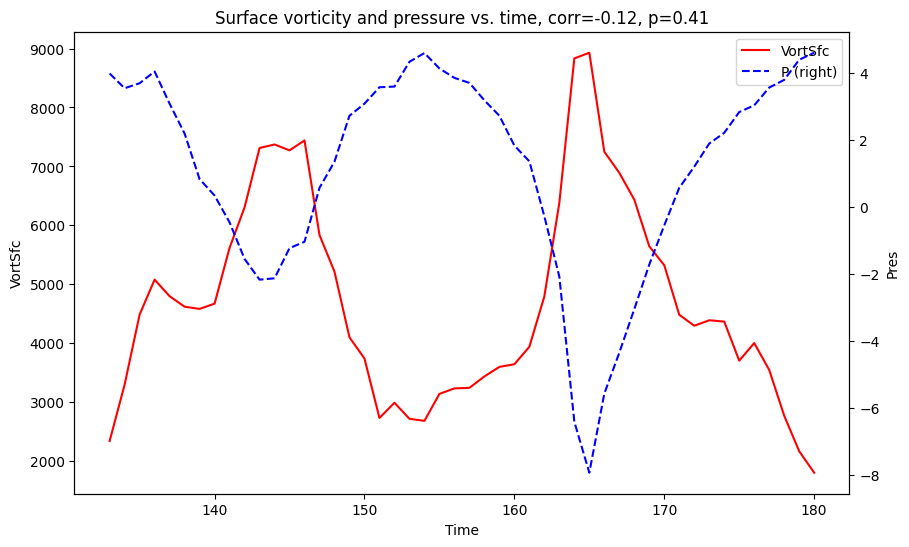

In [41]:
# >> K. OVERLAY 2-AXIS PLOT (of VortSfc and Pres vs. Time)
#
# ... using Pandas plotting.
#
#  1. ax = data.plot(x="Time",y="VortSfc", option, option...
#        ... with options:
#              color='r'          ... for solid red VortSfc
#              figsize=(10,6)     ... set figsize inside the .plot()
#
#  2. data.plot(x="Time",y="P", option, option...
#        ... with options:
#              color='b'          ... for blue
#              style='--'         ... for Dashed blue
#              legend=True        ... to add a legend
#              secondary_y=True   ... to use the right-Y axis for plot
#              ax=ax              ... to overlay on the prior ax=data.plot()
#
#  3. add Left Y-axis label with ax.set_ylabel() to say: VortSfc
#  4. add Right Y-axis label with, no kidding: ax.right_ax.set_ylabel('Pres');
#
#  5. grab pearson correlation coefficient code from before; use it here
#     to get r,p = sp.stats etc etc. for data.VortSfc and data.P
#
#  6. add a title that includes the r,p values, each with 2 digits after the
#     decimal point, so title looks like:
#
#          Surface vorticity and pressure vs. time, corr=X.XX, p=Y.YY'
#
#     with values of r and p in place of X.XX and Y.YY shown here.
#     ... this all goes into: ax.set_title()
#
# CHECK: you should get one solid red line (VortSfc), one dashed blue line (P),
#     a legend in the plot box, a title above the plot box, and your title should
#     show the correlation value which is approximately -0.9
#     (negatively correlated)
ax = data.plot(x="Time",y="VortSfc", color='r', figsize=(10,6))
data.plot(x="Time",y="P", color='b', style='--', legend=True, secondary_y=True, ax=ax)
ax.set_ylabel('VortSfc')
ax.right_ax.set_ylabel('Pres')

r, p = sp.stats.pearsonr(data.VortSfc, data.Time)
plt.title('Surface vorticity and pressure vs. time, corr=%.2f, p=%.2f' % (r, p))

In [42]:
# >> L. SCATTER PLOT
#
#  The previous cell make clear that VortSfc and Pres increase/decrease in opposite ways,
#  hence the negative correlation.  Let's make a scatter plot showing how this happens.
#
#  1. plotly.express is already imported as 'px' at top of this notebook.
#     do you remember how to make a scatter plot with px.scatter()?
#     check your earthquake program ...
#
#  2. Make a px.scatter plot ... using fig=px.scatter( data_set, x=....)
#       data set is: data
#       x='VortSfc'
#       y='P'
#       color is data.Wlow
#       size is data.Rain
#
#  3. Add title with fig.update_layout(title_text=' ')
#       with title: Scatter plot of VortSfc vs. P
#
#  4. Your x- and y-labels are done for you when you used x='VortSfc' etc.
#  5. The colorbar is done for you also ... darker is stronger negative Wlow
#  6. Remember you can mouse-over the circles to see the data.
#
# CHECK: higher VortSfc is found only with lower (negative) values of P,
#   and strongly negative Wlow only happens with high VortSfc, low P
fig = px.scatter(
    data, 
    x='VortSfc', 
    y='P', 
    color='Wlow', 
    size='Rain',
    title='Scatter plot of VortSfc vs. P'
)

fig.update_layout(title_text='Scatter plot of VortSfc vs. P')

In [43]:
# >> M. CORRELATIONS
#
# Suppose we want to compare each data column to every other column and compute
# the correlation for each pair ... we can do this in one statement!
#
#  1. corr=data.corr(method='pearson')        # does everything for us!
#  2. corr                                    # shows contents of 'corr'
#
# CHECK: every field correlated against itself has correlation = 1.00, so there is
# a diagonal set of 1.000 values in the table.  Qgr is all zeros, and here: NaN
corr = data.corr(method='pearson')
corr

,Time,dBZ2k,dBZmx,RHsfc,Rain,P,VortSfc,VortAll,VrtDepth,Usfc,Vsfc,Wlow,Wmin,Wmax,Tsfc,TPsfc,Tgrad,Qgr,Qra,Convg
Time,1.000000,0.451281,0.352080,0.741100,0.634987,-0.084350,-0.120668,-0.073790,-0.529740,-0.071443,-0.175972,-0.168786,0.035344,-0.306748,-0.375564,-0.375559,-0.345836,NaN,0.687666,0.325189
dBZ2k,0.451281,1.000000,0.242430,0.448200,0.667923,-0.467171,0.457351,0.523783,-0.675269,0.295435,-0.639515,0.015905,-0.074809,-0.419317,-0.385418,-0.385382,-0.742512,NaN,0.566922,-0.024436
dBZmx,0.352080,0.242430,1.000000,0.394267,0.176171,0.054086,-0.040579,-0.042227,-0.191746,0.115866,0.090010,0.033224,0.026779,-0.133033,-0.132363,-0.132416,-0.202783,NaN,0.416904,0.263101
RHsfc,0.741100,0.448200,0.394267,1.000000,0.627025,0.005712,-0.110359,-0.046650,-0.485517,-0.116116,-0.205282,-0.203442,-0.217186,-0.524591,-0.692486,-0.692474,-0.349862,NaN,0.868148,0.224168
Rain,0.634987,0.667923,0.176171,0.627025,1.000000,-0.646093,0.527057,0.570219,-0.520728,0.216468,-0.516741,-0.069115,-0.181690,-0.724653,-0.361633,-0.361605,-0.534197,NaN,0.560783,-0.079734
P,-0.084350,-0.467171,0.054086,0.005712,-0.646093,1.000000,-0.920557,-0.927561,0.197679,-0.313055,0.329824,0.065926,0.171506,0.486820,-0.078554,-0.078581,0.324154,NaN,0.114887,0.291719
VortSfc,-0.120668,0.457351,-0.040579,-0.110359,0.527057,-0.920557,1.000000,0.979268,-0.197807,0.415678,-0.404227,0.054245,-0.202023,-0.461102,0.056372,0.056402,-0.312956,NaN,-0.165940,-0.391506
VortAll,-0.073790,0.523783,-0.042227,-0.046650,0.570219,-0.927561,0.979268,1.000000,-0.253300,0.383999,-0.415142,0.058517,-0.208763,-0.481714,0.027434,0.027470,-0.352784,NaN,-0.093905,-0.389954
VrtDepth,-0.529740,-0.675269,-0.191746,-0.485517,-0.520728,0.197679,-0.197807,-0.253300,1.000000,-0.147366,0.480236,-0.035451,0.177427,0.383294,0.407452,0.407403,0.422950,NaN,-0.518279,-0.165719
Usfc,-0.071443,0.295435,0.115866,-0.116116,0.216468,-0.313055,0.415678,0.383999,-0.147366,1.000000,-0.544603,-0.182324,0.008598,-0.103661,-0.267696,-0.267757,-0.497653,NaN,0.090374,0.274228


<Axes: >

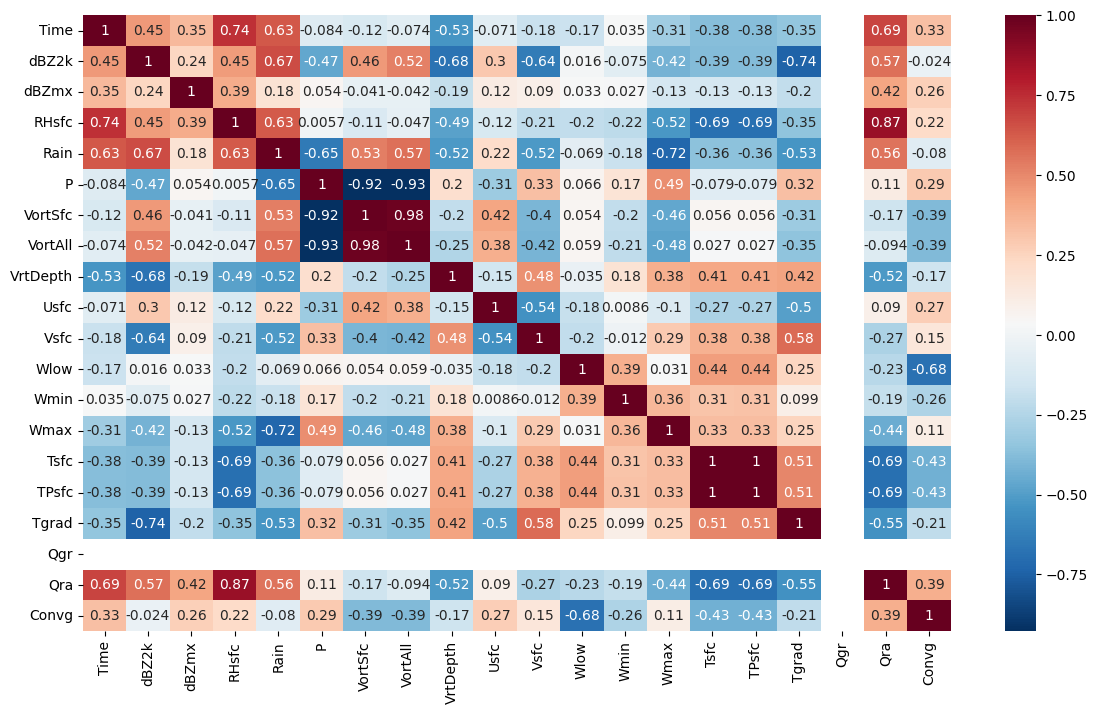

In [46]:
# >> N. HEATMAP
#
#  Let's see all those correlations in a heatmap colored-table of array 'corr'
#
#  1. Import seaborn as sb
#  2. Make a large-r figure; I used plt.figure() for a 14x8" figure
#  3. Try: sb.heatmap(corr, annot=True)
#
#  4. It isn't so easy to see what we want here.  Add this option
#     to the sb.heatmap call:  cmap='RdBu_r'
#     ... now the bold colors are for strong (+/-) correlations.
#     Find similar color maps by searching: matplotlib diverging maps

import seaborn as sb

plt.figure(figsize=(14, 8))
sb.heatmap(corr, annot=True, cmap='RdBu_r')

01  dBZ2k
02  dBZmx
03  RHsfc
04  Rain
VortSfc correlated with column 04, Rain: r=0.53


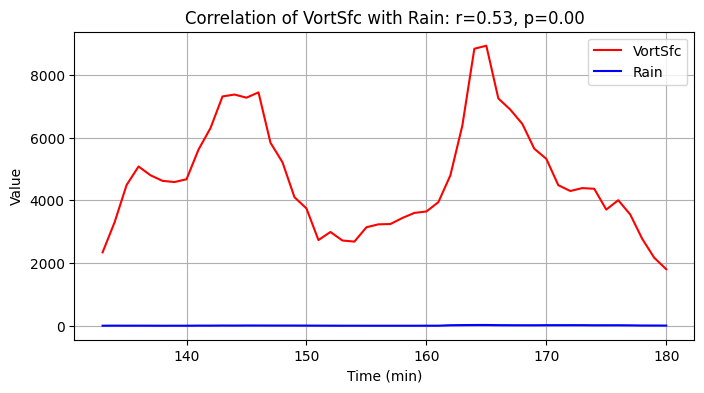

05  P
VortSfc correlated with column 05, P: r=-0.92


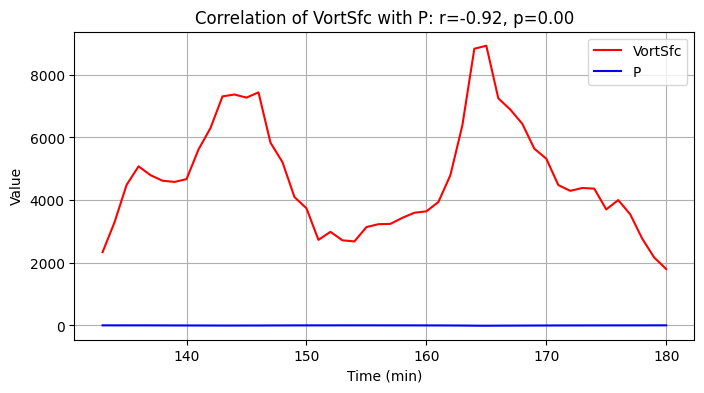

06  VortSfc
07  VortAll
VortSfc correlated with column 07, VortAll: r=0.98


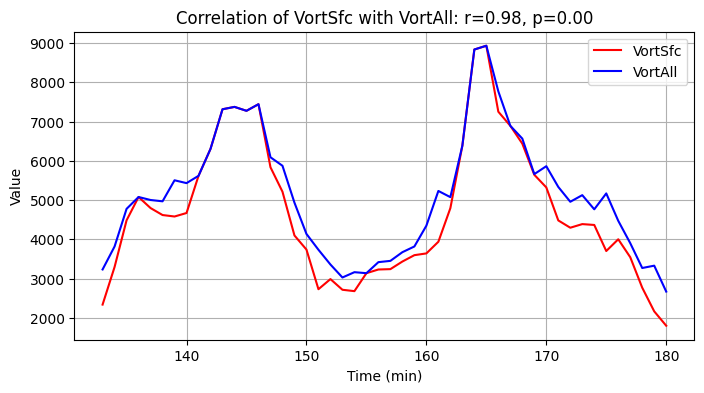

08  VrtDepth
09  Usfc
10  Vsfc
11  Wlow
12  Wmin
13  Wmax
14  Tsfc
15  TPsfc
16  Tgrad
17  Qgr
18  Qra
19  Convg


In [ ]:
# >> O. PLOT "IMPORTANT" FIELDS
#
# Suppose you had 1000's of fields.  You only want to see those with strong
# correlations to VortSfc.  We'll step through all fields and only plot
# those with correlation < -0.5 =or= > +0.5 .
#
#  1. Loop variable 'col' from 1 to the number of columns (2nd dimension of data)
#       (so, range() goes to columns-1 as usual)
#
#  2. Inside the loop:
#   a) print the column number (2-digit format), and the
#      name of the column (print with format %s, and use data.columns[col]
#
#   b) set 'array' to the data array for this column.  You can do that using
#      data.iloc[:,col], storing all rows and just this column to 'array'
#
#   c) set variable 'name' to the name of this column, which you can
#      get using data.columns[col]
#
#   d) we are going to omit two columns from our search: VortSfc (not need
#      to correlate VortSfc with itself), and also Qgr (which is all zeros).
#      Do this by an if statement, making sure name does not equal 'VortSfc'
#      and name does not equal 'Qgr'.  What follows are for all those fields
#      without those names:
#
#   e) Inside the if ... :  ... statement:
#
#      (1) compute the correlation r and p-value between data.VortSfc, and array
#      (2) if r is less than -0.5 or r is greater than +0.5:
#
#        *) Print: VortSfc correlated with column (insert 2-digit col),
#             name (insert name, %s), r=(insert value of r, formatted ##.##)
#        *) Repeat the cell H code for a plot of VortSfc vs. time, overlaid
#             with a plot of 'array' vs. time formatted as we did P in cell H.
#        *) Format the title as we did in cell H, inserting the column name, r and p.

for col in range(1, data.shape[1]):
    print(f"{col:02d}  {data.columns[col]}")

    array = data.iloc[:, col]
    name = data.columns[col]

    if name != 'VortSfc' and name != 'Qgr':
        r, p = sp.stats.pearsonr(data['VortSfc'], array)
        if r < -0.5 or r > 0.5:
            print(f"VortSfc correlated with column {col:02d}, {name}: r={r:.2f}")

            plt.figure(figsize=(8, 4))
            plt.plot(data['Time'], data['VortSfc'], 'r', label='VortSfc')
            plt.plot(data['Time'], array, 'b', label=name)
            plt.xlabel('Time (min)')
            plt.ylabel('Value')
            plt.title(f'Correlation of VortSfc with {name}: r={r:.2f}, p={p:.2f}')
            plt.legend()
            plt.grid()
            plt.show()


In [ ]:
# USE THIS cell to SAVE NOTEBOOK as HTML
# %%shell
# jupyter nbconvert --to html  NAME